In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [100]:
data=pd.read_csv("data_version_4.csv")
data.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,Purpose,Location,Age Possession,area,price_per_sqft,colony,province,society,property Type,area_room_ratio
0,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.0,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses,453.666667
1,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12461.0,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses,635.333333
2,5,42644685,Rawalpindi,2.0,3.0,3.0,1.0,1.0,1.0,2.25,For Sale,"Askari 14, Rawalpindi, Punjab,",Moderately Old,2722.0,8266.0,Askari 14,Punjab,Askari 14,Houses,907.333333
3,6,52099738,Rawalpindi,3.0,2.0,2.0,0.0,1.0,1.0,1.15,For Sale,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1171.0,9821.0,Bahria Town,Punjab,Bahria Town Rawalpindi,Flats,585.500000
4,7,51956291,Rawalpindi,1.0,4.0,5.0,0.0,0.0,0.0,1.75,For Sale,"Defence Road, Rawalpindi, Punjab,",Undefined,1361.0,12858.0,Defence Road,Punjab,Defence Road,Houses,340.250000


In [101]:
data.isnull().sum()

,0
Unnamed: 0,0
House Number,0
City,0
Parking Spaces,0
Bedrooms,0
Bathrooms,0
Servant Quarters,0
Kitchens,0
Store Rooms,0
price,0


In [102]:
data.duplicated().sum()

0

In [103]:
data.rename(columns={'property Type':'property_type'},inplace=True)

In [104]:
data.property_type.value_counts()

,count
property_type,
Houses,677
Flats,70
Upper,8
Lower,4


In [107]:
data.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property_type', 'area_room_ratio'],
      dtype='object')

In [109]:
data.drop(['Unnamed: 0',"House Number"],axis=1,inplace=True)

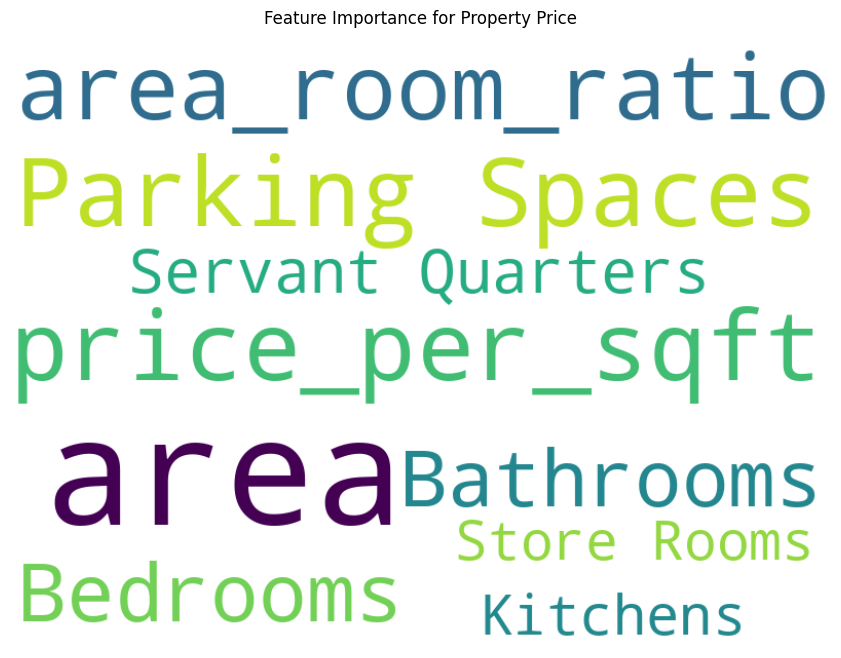

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Select numeric features for correlation calculation
numeric_cols = data.select_dtypes(include='number')

# Calculate correlation with 'price'
correlations = numeric_cols.corr()['price'].drop('price').abs().sort_values(ascending=False)

# Convert correlations to a dictionary (for the WordCloud)
correlation_dict = correlations.to_dict()

# Create a Word Cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='viridis')
wordcloud.generate_from_frequencies(correlation_dict)

# Display the Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Feature Importance for Property Price')
plt.show()


# area vs price according to property tyep
1. in this case if user select house then first graph show
2. in this case if user select flats then second graph show

In [71]:
px.scatter(data[data['property_type'] == 'Houses'], x="area", y="price", color="Bedrooms", title="Area Vs Price")

In [72]:
px.scatter(data[data['property_type'] == 'Flats'], x="area", y="price", color="Bedrooms", title="Area Vs Price")

# bedrooms and kitchen according to colony

In [73]:
# we show in case if user select all colony then show this
px.pie(data, names='Bedrooms')



In [74]:
data['colony'].value_counts()

,count
colony,
Bahria Town Phase 8,107
Bahria Greens,33
Bahria Town,32
DHA Phase 6,29
Bahria Town Phase 8,26
...,...
Air Avenue,1
Awan Market,1
Misryal Road,1


In [75]:
# in this case if you select specific colony then show this graph
px.pie(data[data['colony'] =='Bahria Town Phase 8'], names='Bedrooms')

for kitchen

In [76]:
df.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property Type', 'area_room_ratio'],
      dtype='object')

In [77]:
# we show in case if user select all colony then show this
px.pie(data, names='Kitchens')



In [78]:
# in this case if you select specific colony then show this graph
px.pie(data[data['colony'] =='Bahria Town Phase 8'], names='Kitchens')

# - average price by bk


In [92]:
import pandas as pd
import plotly.express as px

# Calculate average price by bedrooms
avg_price_by_bedrooms = data.groupby('Bedrooms')['price'].mean().reset_index()
avg_price_by_bedrooms = avg_price_by_bedrooms[avg_price_by_bedrooms['Bedrooms'] >= 1]

# Helper function to format price (Cr or Lakhs)
def format_price(value):
    if value >= 1:
        return f"{value:.2f} Cr"  # Values ≥ 1 Cr
    else:
        return f"{value * 100:.0f} L"  # Values < 1 Cr (converted to Lakhs)

# Apply formatting to display Cr/L
avg_price_by_bedrooms['formatted_price'] = avg_price_by_bedrooms['price'].apply(format_price)

# Bar Chart - Bedrooms vs. Average Price (with formatted hover)
fig = px.bar(avg_price_by_bedrooms,
             x='Bedrooms',
             y='price',
             title='Average Price by Number of Bedrooms',
             labels={'price': 'Average Price (Cr/L)', 'Bedrooms': 'Number of Bedrooms'},
             color='price',
             hover_data=['formatted_price'])

# Show chart
fig.show()


In [91]:
import pandas as pd
import plotly.express as px

# Calculate average price by number of kitchens
avg_price_by_kitchens = data.groupby('Kitchens')['price'].mean().reset_index()

# Filter to exclude 0 kitchens and include only 1 or more
avg_price_by_kitchens = avg_price_by_kitchens[avg_price_by_kitchens['Kitchens'] >= 1]

# Helper function to format price (Cr or Lakhs)
def format_price(value):
    if value >= 1:
        return f"{value:.2f} Cr"  # Values ≥ 1 Cr
    else:
        return f"{value * 100:.0f} L"  # Values < 1 Cr (converted to Lakhs)

# Apply formatting to display Cr/L
avg_price_by_kitchens['formatted_price'] = avg_price_by_kitchens['price'].apply(format_price)

# Bar Chart - Kitchens vs. Average Price (with formatted hover)
fig = px.bar(avg_price_by_kitchens,
             x='Kitchens',
             y='price',
             title='Average Price by Number of Kitchens (1 and Above)',
             labels={'price': 'Average Price (Cr/L)', 'Kitchens': 'Number of Kitchens'},
             color='price',
             hover_data=['formatted_price'])

# Show chart
fig.show()


## avg price per colony

In [83]:
import pandas as pd
import plotly.express as px

# Calculate avg price per colony
avg_price_per_colony = data.groupby('colony')['price'].mean().reset_index()
avg_price_per_colony.rename(columns={'price': 'avg_price_per_colony'}, inplace=True)

# Merge with original DataFrame
data = pd.merge(data, avg_price_per_colony, on='colony', how='left')

# Treemap: Property Distribution by Colony with Avg Price on Hover
fig = px.treemap(data, path=['City', 'colony'],
                 title='Property Distribution by Colony',
                 color='City',
                 hover_data=['avg_price_per_colony'])

fig.show()


In [84]:
data.head()

,Unnamed: 0,House Number,City,Parking Spaces,Bedrooms,Bathrooms,Servant Quarters,Kitchens,Store Rooms,price,...,Location,Age Possession,area,price_per_sqft,colony,province,society,property_type,area_room_ratio,avg_price_per_colony
0,3,52061409,Rawalpindi,1.0,3.0,3.0,0.0,1.0,0.0,1.50,...,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1361.0,11021.0,Bahria Town Phase 8,Punjab,Bahria Town Rawalpindi,Houses,453.666667,3.364299
1,4,52010487,Rawalpindi,3.0,6.0,6.0,1.0,2.0,1.0,4.75,...,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",New Property,3812.0,12461.0,Bahria Greens,Punjab,Bahria Town Rawalpindi,Houses,635.333333,7.221212
2,5,42644685,Rawalpindi,2.0,3.0,3.0,1.0,1.0,1.0,2.25,...,"Askari 14, Rawalpindi, Punjab,",Moderately Old,2722.0,8266.0,Askari 14,Punjab,Askari 14,Houses,907.333333,3.921429
3,6,52099738,Rawalpindi,3.0,2.0,2.0,0.0,1.0,1.0,1.15,...,"Bahria Town Rawalpindi, Rawalpindi, Punjab,",Relatively New,1171.0,9821.0,Bahria Town,Punjab,Bahria Town Rawalpindi,Flats,585.500000,3.135937
4,7,51956291,Rawalpindi,1.0,4.0,5.0,0.0,0.0,0.0,1.75,...,"Defence Road, Rawalpindi, Punjab,",Undefined,1361.0,12858.0,Defence Road,Punjab,Defence Road,Houses,340.250000,1.475000


## average price by property type

In [96]:
import pandas as pd
import plotly.express as px

# Calculate the average price by property type
avg_price_by_property = data.groupby('property_type')['price'].mean().reset_index()

# Helper function to format price (Cr or Lakhs)
def format_price(value):
    return f"{value:.2f} Cr" if value >= 1 else f"{value * 100:.0f} L"

# Apply formatting for hover display
avg_price_by_property['formatted_price'] = avg_price_by_property['price'].apply(format_price)

# Side-by-side bar chart using Plotly
fig = px.bar(avg_price_by_property,
             x='property_type',
             y='price',
             title='Average Price by Property Type',
             labels={'price': 'Average Price (Cr/L)', 'property_type': 'Property Type'},
             color='property_type',  # Different colors for each type
             hover_data=['formatted_price'])

# Customize layout
fig.update_layout(barmode='group')  # Ensures side-by-side bars

# Show chart
fig.show()


In [98]:
data.columns

Index(['Unnamed: 0', 'House Number', 'City', 'Parking Spaces', 'Bedrooms',
       'Bathrooms', 'Servant Quarters', 'Kitchens', 'Store Rooms', 'price',
       'Purpose', 'Location', 'Age Possession', 'area', 'price_per_sqft',
       'colony', 'province', 'society', 'property_type', 'area_room_ratio',
       'avg_price_per_colony', 'formatted_price'],
      dtype='object')

In [113]:
df=pd.read_csv("/content/final_data_unclean.csv")
df.head()

,Unnamed: 0,House Number,Rawalpindi Houses,Name,Price,Type,Main Features,Rooms,Details
0,0,House 48022756,Rawalpindi Houses,Classical Corner House With Huge Lawn Near Fut...,"Bahria Town Phase 8, Bahria Town Rawalpindi, R...",CLASSICAL ELEVATION DESIGN LUXURIOUS FINISHING...,Built in year: 2023 | Parking Spaces | Floorin...,"Bedrooms: 5, Bathrooms: 6, Servant Quarters: 1...","Type: House, Price: PKR7.5 Crore, Location: Ba..."
1,1,House 51560745,Rawalpindi Houses,Designer House Near To Park & Bahria Expressway,"Bahria Town Phase 8, Bahria Town Rawalpindi, R...",Luxurious House With Elegant Interior Close To...,Built in year: 2024 | Parking Spaces | Double ...,"Bedrooms: 5, Bathrooms: 6, Servant Quarters: 1...","Type: House, Price: PKR3.75 Crore, Location: B..."
2,2,House 51815448,Rawalpindi Houses,Slightly Used 10 Marla At Reasonable Price,"Bahria Town Phase 4, Bahria Town Rawalpindi, R...",It's A Few Years Old House Occupied For Very L...,Parking Spaces | Flooring | Electricity Backup...,"Bedrooms: 5, Bathrooms: 6, Servant Quarters: 1...","Type: House, Price: PKR4.25 Crore, Location: B..."
3,3,House 52061409,Rawalpindi Houses,NEW 5 MARLA HOUSE IN BAHRIA TOWN,"Bahria Town Phase 8 - Safari Valley, Bahria To...","House Features Are,5 Marla 2 Portions 3 Spaci...",Built in year: 2024 | Parking Spaces: 1 | Floo...,"Bedrooms: 3, Bathrooms: 3, Servant Quarters, D...","Type: House, Price: PKR1.5 Crore, Location: Ba..."
4,4,House 52010487,Rawalpindi Houses,Triple Story Corner Plus Lawn 14 Marla Used Ho...,"Bahria Greens - Overseas Enclave - Sector 2, B...",14 Marla Corner Plus Basement Triple Story Use...,Built in year: 2019 | Parking Spaces: 3 | Doub...,"Bedrooms: 6, Bathrooms: 6, Servant Quarters: 1...","Type: House, Price: PKR4.75 Crore, Location: B..."


In [119]:
df['Main Features'][100]

'Built in year: 2024 | Parking Spaces | Flooring | Electricity Backup | Waste Disposal | Floors: 2 | Other Main Features'